# Supervised Learning in R: Classification

This beginner-level introduction to machine learning covers four of the most common classification algorithms. You will come away with a basic understanding of how each algorithm approaches a learning task, as well as learn the R functions needed to apply these tools to your own work.

## k-Nearest Neighbors (kNN)

As the kNN algorithm literally "learns by example" it is a case in point for starting to understand supervised machine learning. This chapter will introduce classification while working through the application of kNN to self-driving vehicle road sign recognition.

### Recognizing a road sign with kNN
After several trips with a human behind the wheel, it is time for the self-driving car to attempt the test course alone.

As it begins to drive away, its camera captures the following image:


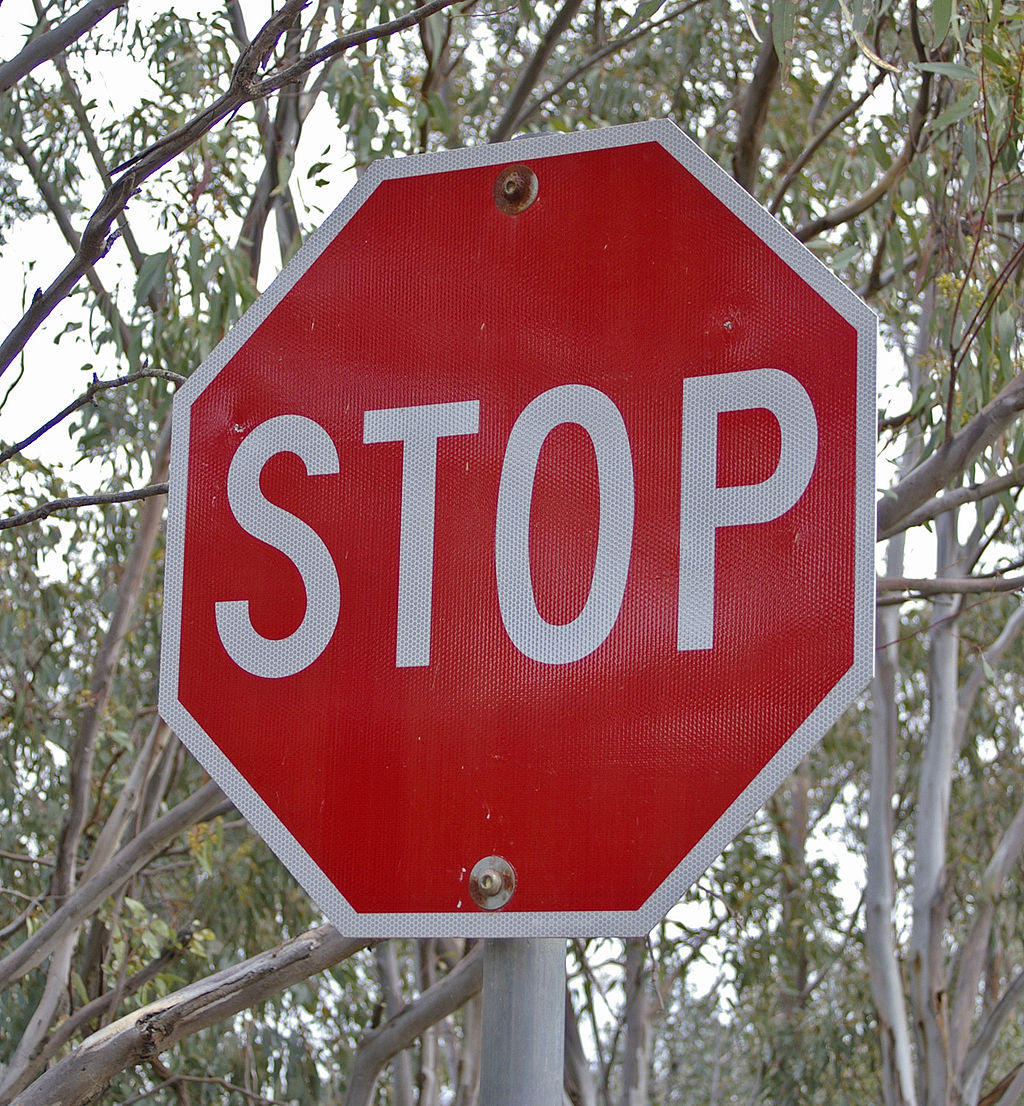

Can you apply a kNN classifier to help the car recognize this sign?

The dataset signs is loaded in your workspace along with the dataframe next_sign, which holds the observation you want to classify.

In [7]:
signs = read.csv("knn_traffic_signs.csv")
next_sign = read.csv("knn_traffic_signs_example.csv")

# Load the 'class' package
# install.packages("class")
library(class)
# Create a vector of labels
sign_types <- signs$sign_type

# Classify the next sign observed
knn(train = signs[-1], test = next_sign, cl = sign_types)


[1] stop
Levels: pedestrian speed stop

### Exploring the traffic sign dataset
To better understand how the knn() function was able to classify the stop sign, it may help to examine the training dataset it used.

Each previously observed street sign was divided into a 4x4 grid, and the red, green, and blue level for each of the 16 center pixels is recorded as illustrated here.

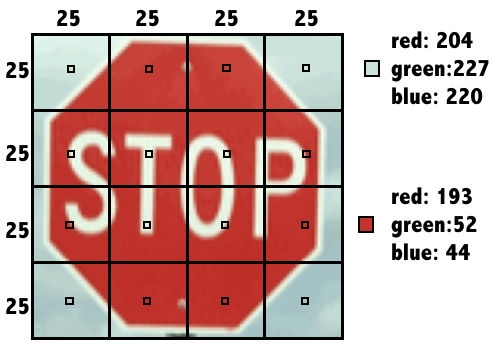

The result is a dataset that records the sign_type as well as 16 x 3 = 48 color properties of each sign.

In [9]:
# Examine the structure of the signs dataset
str(signs)

# Count the number of signs of each type
table(signs$sign_type)

# Check r10's average red level by sign type
aggregate(r10 ~ sign_type, data = signs, mean)

'data.frame':	146 obs. of  49 variables:
 $ sign_type: Factor w/ 3 levels "pedestrian","speed",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ r1       : int  155 142 57 22 169 75 136 149 13 123 ...
 $ g1       : int  228 217 54 35 179 67 149 225 34 124 ...
 $ b1       : int  251 242 50 41 170 60 157 241 28 107 ...
 $ r2       : int  135 166 187 171 231 131 200 34 5 83 ...
 $ g2       : int  188 204 201 178 254 89 203 45 21 61 ...
 $ b2       : int  101 44 68 26 27 53 107 1 11 26 ...
 $ r3       : int  156 142 51 19 97 214 150 155 123 116 ...
 $ g3       : int  227 217 51 27 107 144 167 226 154 124 ...
 $ b3       : int  245 242 45 29 99 75 134 238 140 115 ...
 $ r4       : int  145 147 59 19 123 156 171 147 21 67 ...
 $ g4       : int  211 219 62 27 147 169 218 222 46 67 ...
 $ b4       : int  228 242 65 29 152 190 252 242 41 52 ...
 $ r5       : int  166 164 156 42 221 67 171 170 36 70 ...
 $ g5       : int  233 228 171 37 236 50 158 191 60 53 ...
 $ b5       : int  245 229 50 3 117 36 108 113 26 26 


pedestrian      speed       stop 
        46         49         51 

sign_type,r10
pedestrian,113.71739
speed,80.63265
stop,132.39216


As you might have expected, stop signs tend to have a higher average red value. This is how kNN identifies similar signs.

### Classifying a collection of road signs
Now that the autonomous vehicle has successfully stopped on its own, your team feels confident allowing the car to continue the test course.

The test course includes 59 additional road signs divided into three types:

1. Stop Sign 
2. Speed Limit Sign 
3. Pedestrian Sign

At the conclusion of the trial, you are asked to measure the car's overall performance at recognizing these signs.

The class package and the dataset signs are already loaded in your workspace. So is the dataframe test_signs, which holds a set of observations you'll test your model on.

In [11]:
test_signs = read.csv("knn_traffic_signs_test.csv")

# Use kNN to identify the test road signs
sign_types <- signs$sign_type
signs_pred <- knn(train = signs[-1], test =  test_signs[-1], cl = sign_types)

# Create a confusion matrix of the predicted versus actual values
signs_actual <- test_signs$sign_type
table(signs_pred, signs_actual)

# Compute the accuracy
mean(signs_pred == signs_actual)

            signs_actual
signs_pred   pedestrian speed stop
  pedestrian         19     2    0
  speed               0    17    0
  stop                0     2   19

[1] 0.9322034

### Testing other 'k' values
By default, the knn() function in the class package uses only the single nearest neighbor.

Setting a k parameter allows the algorithm to consider additional nearby neighbors. This enlarges the collection of neighbors which will vote on the predicted class.

Compare k values of 1, 7, and 15 to examine the impact on traffic sign classification accuracy.

The class package is already loaded in your workspace along with the datasets signs, signs_test, and sign_types. The object signs_actual holds the true values of the signs.

In [12]:
# Compute the accuracy of the baseline model (default k = 1)
k_1 <- knn(train = signs[-1], test =  test_signs[-1], cl = sign_types)
mean(k_1 == signs_actual)

# Modify the above to set k = 7
k_7 <- knn(train = signs[-1],test = test_signs[-1], cl = sign_types, k = 7)
mean(k_7 == signs_actual)

# Set k = 15 and compare to the above
k_15 <- knn(train = signs[-1],test =  test_signs[-1], cl = sign_types, k = 15)
mean(k_15 == signs_actual)

# note how "higher is not better"

[1] 0.9322034

[1] 0.9661017

[1] 0.8813559

### Seeing how the neighbors voted
When multiple nearest neighbors hold a vote, it can sometimes be useful to examine whether the voters were unanimous or widely separated.

For example, knowing more about the voters' confidence in the classification could allow an autonomous vehicle to use caution in the case there is any chance at all that a stop sign is ahead.

In this exercise, you will learn how to obtain the voting results from the knn() function.

The class package has already been loaded in your workspace along with the datasets signs, sign_types, and signs_test.

In [13]:
# Use the prob parameter to get the proportion of votes for the winning class
sign_pred <- knn(train = signs[-1], test = test_signs[-1], cl = sign_types, k = 7, prob = TRUE)

# Get the "prob" attribute from the predicted classes
sign_prob <- attr(sign_pred, "prob")

# Examine the first several predictions
head(sign_pred)

# Examine the proportion of votes for the winning class
head(sign_prob)

[1] pedestrian pedestrian pedestrian stop       pedestrian pedestrian
Levels: pedestrian speed stop

[1] 0.5714286 0.5714286 0.8571429 0.5714286 0.8571429 0.5714286